In [1]:
import pandas as pd
import numpy as np
import re
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300

In [2]:
sale = pd.read_pickle('sale_with_categories1.pkl')
inventory = pd.read_pickle('inventory.pkl')

In [126]:
sale.head(5)

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue
0,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,576.0
1,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,576.0
2,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500TQ,576.0
3,DTA1B2029,WG-COR,row wood bead stretch br,CHE005,2016-05-20,12,3.25,$ 39.00,NaN,IMPORT,NOBLES,LA,71235,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,5,DTA1B2029WG-COR,39.0
4,DTA1B2029,WG-COR,row wood bead stretch br,GMA01,2016-08-22,24,3.25,$ 78.00,NaN,IMPORT,NOBLES,0,0,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-COR,78.0


In [ ]:
inventory.head(5)

In [ ]:
sale.head(50)

In [3]:
sale['INVC DATE'] = pd.to_datetime(sale['INVC DATE'])

In [ ]:
sale.head(5)

In [4]:
sale['year'] = pd.DatetimeIndex(sale['INVC DATE']).year

In [5]:
sale['month'] = pd.DatetimeIndex(sale['INVC DATE']).month

In [6]:
sale.loc[sale['QTY'] < 0]

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month
6,DTA1B2029,WG-COR,row wood bead stretch br,HIS001,2016-08-25,-12,$ 3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8
13,DTA1B2029,WG-CRM,row pearl bead stretch br,HIS001,2016-08-25,-12,$ 3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/4/16,"[row, pearl, bead, stretch, br]",EarRings,row pearl bead stretch br,bead,2016,8
27,DTA1B2029,WG-GRY,row wood bead stretch br,HIS001,2016-08-25,-12,$ 3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/4/16,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8
50,DTA1B2029,WG-JET,row wood bead stretch br,HIS001,2016-08-25,-12,$ 3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/12/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8
58,DTA1B2029,WG-LBR,row wood bead stretch br,ADE001,2016-07-20,-12,$ 3.25,$ (39.00),RETUR,IMPORT,NOBLES,AZ,85027,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/8/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,7
66,DTA1B2029,WG-LBR,row wood bead stretch br,HIS001,2016-08-25,-12,$ 3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/8/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8
114,DTA1B2066,G-IV,multi strand wood bracelet,ADE001,2016-07-20,-12,$ 4.75,$ (57.00),RETUR,IMPORT,NOBLES,AZ,85027,2016,2016 1ST,SS16,4/11/16,4/11/16,10/3/18,4/12/16,"[multi, strand, wood, bracelet]",Bracelet,multi strand wood bracelet,wood,2016,7
147,DTA1B2072,BL-HOW,natural stone stretch br,BEL007,2016-08-10,-24,$ 3.75,$ (90.00),RETUR,IMPORT,NOBLES,UK,TN127ET,2016,2016 1ST,SS16,5/23/16,4/26/16,10/3/18,4/29/16,"[natural, stone, stretch, br]",Bracelet,natural stone stretch br,Nature_Stone,2016,8
159,DTA1B2072,CHA-RQ,natural stone stretch br,BEL007,2016-08-10,-24,$ 3.75,$ (90.00),RETUR,IMPORT,NOBLES,UK,TN127ET,2016,2016 1ST,SS16,4/26/16,4/11/16,10/3/18,4/11/16,"[natural, stone, stretch, br]",Bracelet,natural stone stretch br,Nature_Stone,2016,8
172,DTA1B2072,GRY-JET,natural stone stretch br,BEL007,2016-08-10,-24,$ 3.75,$ (90.00),RETUR,IMPORT,NOBLES,UK,TN127ET,2016,2016 1ST,SS16,5/23/16,5/23/16,10/3/18,6/16/16,"[natural, stone, stretch, br]",Bracelet,natural stone stretch br,Nature_Stone,2016,8


In [7]:
sale['Style_Color'] = sale['STYLE#'] + sale['COLOR']

In [8]:
sale['UNIT PRICE'] = sale['UNIT PRICE'].str.replace('$', '')
sale['UNIT PRICE'] = sale['UNIT PRICE'].apply(pd.to_numeric, errors = 'ignore')

In [11]:
Return_orders = sale.loc[sale['QTY'] < 0]

In [12]:
Return_orders

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color
6,DTA1B2029,WG-COR,row wood bead stretch br,HIS001,2016-08-25,-12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-COR
13,DTA1B2029,WG-CRM,row pearl bead stretch br,HIS001,2016-08-25,-12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/4/16,"[row, pearl, bead, stretch, br]",EarRings,row pearl bead stretch br,bead,2016,8,DTA1B2029WG-CRM
27,DTA1B2029,WG-GRY,row wood bead stretch br,HIS001,2016-08-25,-12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/4/16,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-GRY
50,DTA1B2029,WG-JET,row wood bead stretch br,HIS001,2016-08-25,-12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/12/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-JET
58,DTA1B2029,WG-LBR,row wood bead stretch br,ADE001,2016-07-20,-12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,AZ,85027,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/8/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,7,DTA1B2029WG-LBR
66,DTA1B2029,WG-LBR,row wood bead stretch br,HIS001,2016-08-25,-12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/8/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-LBR
114,DTA1B2066,G-IV,multi strand wood bracelet,ADE001,2016-07-20,-12,4.75,$ (57.00),RETUR,IMPORT,NOBLES,AZ,85027,2016,2016 1ST,SS16,4/11/16,4/11/16,10/3/18,4/12/16,"[multi, strand, wood, bracelet]",Bracelet,multi strand wood bracelet,wood,2016,7,DTA1B2066G-IV
147,DTA1B2072,BL-HOW,natural stone stretch br,BEL007,2016-08-10,-24,3.75,$ (90.00),RETUR,IMPORT,NOBLES,UK,TN127ET,2016,2016 1ST,SS16,5/23/16,4/26/16,10/3/18,4/29/16,"[natural, stone, stretch, br]",Bracelet,natural stone stretch br,Nature_Stone,2016,8,DTA1B2072BL-HOW
159,DTA1B2072,CHA-RQ,natural stone stretch br,BEL007,2016-08-10,-24,3.75,$ (90.00),RETUR,IMPORT,NOBLES,UK,TN127ET,2016,2016 1ST,SS16,4/26/16,4/11/16,10/3/18,4/11/16,"[natural, stone, stretch, br]",Bracelet,natural stone stretch br,Nature_Stone,2016,8,DTA1B2072CHA-RQ
172,DTA1B2072,GRY-JET,natural stone stretch br,BEL007,2016-08-10,-24,3.75,$ (90.00),RETUR,IMPORT,NOBLES,UK,TN127ET,2016,2016 1ST,SS16,5/23/16,5/23/16,10/3/18,6/16/16,"[natural, stone, stretch, br]",Bracelet,natural stone stretch br,Nature_Stone,2016,8,DTA1B2072GRY-JET


In [15]:
Return_orders.shape

(2627, 27)

In [45]:
Return_orders['QTY'] = abs(Return_orders['QTY'])

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
Return_orders['Potential_rev_lost'] = Return_orders['QTY']*Return_orders['UNIT PRICE']

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
pd.DataFrame(Return_orders.groupby(['year'])['Potential_rev_lost'].sum())

,Potential_rev_lost
year,
2016,101743.25
2017,45226.68
2018,29658.20


In [86]:
state_by_lost = pd.DataFrame(Return_orders.groupby(['State_sold'])['Potential_rev_lost'].sum()).sort_values(by = 'Potential_rev_lost', ascending = False)

In [89]:
state_by_lost = state_by_lost.head(10).reset_index()

In [90]:
state_by_lost

,index,State_sold,Potential_rev_lost
0,0,TX,40722.60
1,1,GA,34776.82
2,2,CA,28713.65
3,3,NC,13009.93
4,4,NY,9663.98
5,5,AL,9040.25
6,6,LA,6018.00
7,7,OH,5227.00
8,8,MT,3552.00
9,9,MS,3406.80


In [105]:
Categories_by_lost = pd.DataFrame(Return_orders.groupby(['Categories1'])['Potential_rev_lost'].sum()).sort_values(by = 'Potential_rev_lost', ascending = False)

In [108]:
Quant_by_lost = pd.DataFrame(Return_orders.groupby(['Categories1'])['QTY'].sum()).sort_values(by = 'QTY', ascending = False)

In [112]:
Quant_by_lost = Quant_by_lost.reset_index()

In [113]:
Categories_by_lost = Categories_by_lost.reset_index()

In [114]:
Categories_by_lost

,Categories1,Potential_rev_lost
0,EarRings,66719.91
1,Necklace,58351.90
2,others,18721.10
3,Bracelet,13630.30
4,Accessories,9842.75
5,Tassel,7540.10
6,Charm,1698.32
7,Ring,123.75


In [117]:
Lost_categories = pd.merge(Categories_by_lost, Quant_by_lost, on = 'Categories1')
Lost_categories

,Categories1,Potential_rev_lost,QTY
0,EarRings,66719.91,33918
1,Necklace,58351.90,17787
2,others,18721.10,7328
3,Bracelet,13630.30,8758
4,Accessories,9842.75,2667
5,Tassel,7540.10,1607
6,Charm,1698.32,555
7,Ring,123.75,26


In [121]:
Lost_categories['loss_severity'] = Lost_categories['Potential_rev_lost'] / Lost_categories['QTY']

In [125]:
Lost_categories.sort_values(by = 'loss_severity', ascending = False)

,Categories1,Potential_rev_lost,QTY,loss_severity
7,Ring,123.75,26,4.759615
5,Tassel,7540.10,1607,4.692035
4,Accessories,9842.75,2667,3.690570
1,Necklace,58351.90,17787,3.280593
6,Charm,1698.32,555,3.060036
2,others,18721.10,7328,2.554735
0,EarRings,66719.91,33918,1.967094
3,Bracelet,13630.30,8758,1.556326


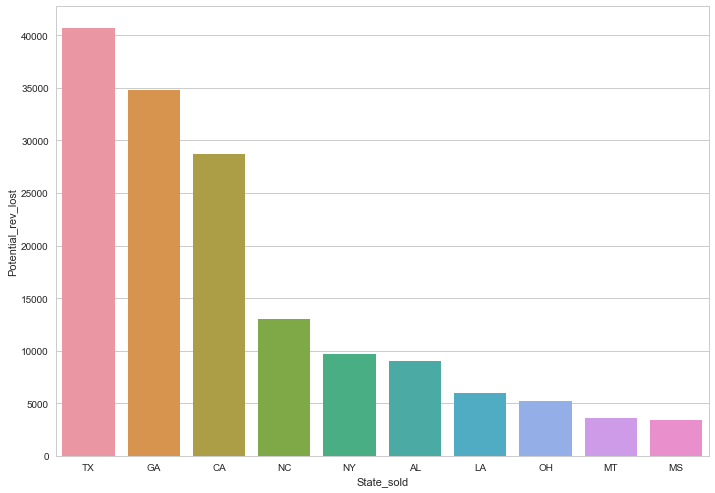

In [91]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax = ax, x="State_sold", y="Potential_rev_lost", data = state_by_lost)

In [68]:
Reason_lost = pd.DataFrame(Return_orders.groupby(['REASON'])['Potential_rev_lost'].sum()).sort_values(by = 'Potential_rev_lost', ascending = False)

In [69]:
Reason_lost

,Potential_rev_lost
REASON,
RETUR,94308.50
MISCH,26728.10
DAM,20259.80
REFUN,13551.00
ADJ,7278.56
BLIND,7134.00
SHORT,4950.37
DISC,1862.55
PROMO,420.00


In [72]:
Reason_lost = Reason_lost.reset_index()

In [73]:
Reason_lost

,REASON,Potential_rev_lost
0,RETUR,94308.50
1,MISCH,26728.10
2,DAM,20259.80
3,REFUN,13551.00
4,ADJ,7278.56
5,BLIND,7134.00
6,SHORT,4950.37
7,DISC,1862.55
8,PROMO,420.00
9,COMM,124.00


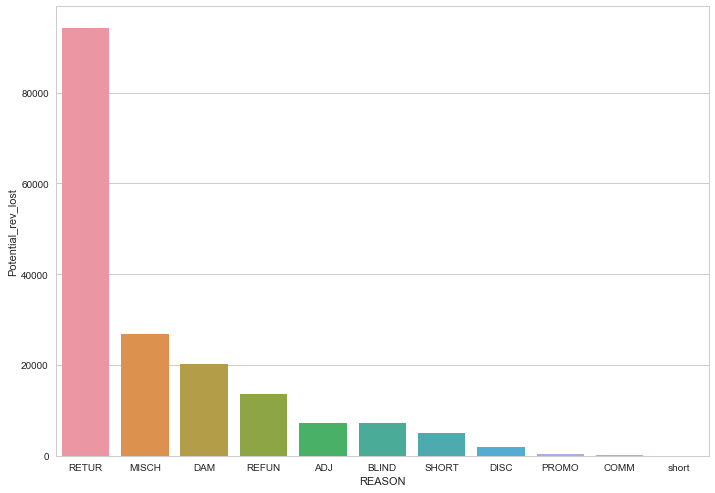

In [75]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax = ax, x="REASON", y="Potential_rev_lost", data=Reason_lost)

In [18]:
return_order_code = list(Return_orders['Style_Color'])

In [14]:
sale.shape

(111038, 27)

In [19]:
new_sale = sale.loc[~sale['Style_Color'].isin(return_order_code)]

In [20]:
new_sale.shape

(72684, 27)

In [22]:
new_sale['EXT-AMT'] = sale['EXT-AMT'].str.replace('$', '')
new_sale['EXT-AMT'] = sale['EXT-AMT'].apply(pd.to_numeric, errors = 'ignore')

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
new_sale['cost_per_unit'] = new_sale['UNIT PRICE'] * 0.5

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
new_sale.head(5)

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,cost_per_unit
0,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,2.000
1,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,2.000
2,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500TQ,2.000
33,DTA1B2029,WG-IV,row wood bead stretch br,BLU003,2016-04-14,36,3.25,$ 111.15,NaN,IMPORT,NOBLES,NY,10001,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,4,DTA1B2029WG-IV,1.625
34,DTA1B2029,WG-IV,row wood bead stretch br,CHE005,2016-05-20,12,3.25,$ 39.00,NaN,IMPORT,NOBLES,LA,71235,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,5,DTA1B2029WG-IV,1.625


In [27]:
new_sale['Cost'] = new_sale['cost_per_unit'] * new_sale['QTY']

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
new_sale.head(5)

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,cost_per_unit,Cost
0,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,2.000,288.0
1,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,2.000,288.0
2,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500TQ,2.000,288.0
33,DTA1B2029,WG-IV,row wood bead stretch br,BLU003,2016-04-14,36,3.25,$ 111.15,NaN,IMPORT,NOBLES,NY,10001,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,4,DTA1B2029WG-IV,1.625,58.5
34,DTA1B2029,WG-IV,row wood bead stretch br,CHE005,2016-05-20,12,3.25,$ 39.00,NaN,IMPORT,NOBLES,LA,71235,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,5,DTA1B2029WG-IV,1.625,19.5


In [29]:
sale['Revenue'] = sale['UNIT PRICE'] * sale['QTY']

In [30]:
Q1 = [1,2,3]
Q2 = [4,5,6]
Q3 = [7,8,9]
Q4 = [10,11,12]

In [31]:
new_sale['Quarter'] = new_sale['month']

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
new_sale.loc[new_sale['Quarter'].isin(Q1),'Quarter']='Q1'
new_sale.loc[new_sale['Quarter'].isin(Q2),'Quarter']='Q2'
new_sale.loc[new_sale['Quarter'].isin(Q3),'Quarter']='Q3'
new_sale.loc[new_sale['Quarter'].isin(Q4),'Quarter']='Q4'

C:\Users\Bird_\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
new_sale.head(5)

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,cost_per_unit,Cost,Quarter
0,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,2.000,288.0,Q2
1,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,2.000,288.0,Q2
2,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500TQ,2.000,288.0,Q2
33,DTA1B2029,WG-IV,row wood bead stretch br,BLU003,2016-04-14,36,3.25,$ 111.15,NaN,IMPORT,NOBLES,NY,10001,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,4,DTA1B2029WG-IV,1.625,58.5,Q2
34,DTA1B2029,WG-IV,row wood bead stretch br,CHE005,2016-05-20,12,3.25,$ 39.00,NaN,IMPORT,NOBLES,LA,71235,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,5,DTA1B2029WG-IV,1.625,19.5,Q2


In [35]:
new_sale['Revenue'] = new_sale['UNIT PRICE'] * new_sale['QTY']

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
new_sale['Gross_Profit'] = new_sale['Revenue'] - new_sale['Cost']

C:\Users\Bird_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
new_sale.head(5)

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,cost_per_unit,Cost,Quarter,Revenue,Gross_Profit
0,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,2.000,288.0,Q2,576.0,288.0
1,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,2.000,288.0,Q2,576.0,288.0
2,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500TQ,2.000,288.0,Q2,576.0,288.0
33,DTA1B2029,WG-IV,row wood bead stretch br,BLU003,2016-04-14,36,3.25,$ 111.15,NaN,IMPORT,NOBLES,NY,10001,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,4,DTA1B2029WG-IV,1.625,58.5,Q2,117.0,58.5
34,DTA1B2029,WG-IV,row wood bead stretch br,CHE005,2016-05-20,12,3.25,$ 39.00,NaN,IMPORT,NOBLES,LA,71235,2017,2017 1ST,SS17,1/18/17,4/4/16,10/3/18,4/6/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,5,DTA1B2029WG-IV,1.625,19.5,Q2,39.0,19.5


In [41]:
revenue_summary = pd.DataFrame(new_sale.groupby(['year'])['Revenue'].sum())
revenue_summary = revenue_summary.reset_index()

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns

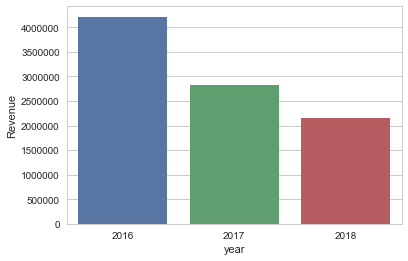

In [44]:
sns.set(style="whitegrid")
sns.barplot(x="year", y="Revenue", data=revenue_summary)

In [94]:
revenue_summary['COGS'] = revenue_summary['Revenue'] *0.5

In [95]:
revenue_summary['Gross_profit'] = revenue_summary['Revenue'] - revenue_summary['COGS']

In [96]:
revenue_summary['Operating_expense'] = 20000*12

In [97]:
revenue_summary['Net_income'] = revenue_summary['Gross_profit'] - revenue_summary['Operating_expense']

In [102]:
revenue_summary['COGS%_of_Rev'] = revenue_summary['COGS']/revenue_summary['Revenue']*100

In [103]:
revenue_summary['GP%_of_Rev'] = revenue_summary['Gross_profit']/revenue_summary['Revenue']*100
revenue_summary['OE%_of_Rev'] = revenue_summary['Operating_expense']/revenue_summary['Revenue']*100
revenue_summary['NI%_of_Rev'] = revenue_summary['Net_income']/revenue_summary['Revenue']*100

In [104]:
revenue_summary

,year,Revenue,COGS,Gross_profit,Operating_expense,Net_income,COGS%_of_Rev,GP%_of_Rev,OE%_of_Rev,NI%_of_Rev
0,2016,4215965.58,2107982.790,2107982.790,240000,1867982.790,50.0,50.0,5.692646,44.307354
1,2017,2827423.63,1413711.815,1413711.815,240000,1173711.815,50.0,50.0,8.488293,41.511707
2,2018,2150065.09,1075032.545,1075032.545,240000,835032.545,50.0,50.0,11.162453,38.837547


In [38]:
inventory.head(5)

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand,Categories
0,DTA1A9500,IV,seed bead anklet,4/12/2016,-144,0,NaN
1,DTA1A9500,IV,seed bead anklet,4/12/2016,144,0,NaN
2,DTA1A9500,MUL,seed bead anklet,4/12/2016,-144,0,NaN
3,DTA1A9500,MUL,seed bead anklet,4/12/2016,144,0,NaN
4,DTA1A9500,TQ,seed bead anklet,4/12/2016,-144,0,NaN


In [40]:
inventory['On-Hand'].value_counts()

0             65498
12             7402
24             4037
72             2888
36             2824
60             2737
84             2669
-12            2377
48             2267
96             2174
120            2145
1              2021
108            1657
-24            1570
144            1479
132            1414
168            1400
156            1087
-48            1054
-36            1052
180            1029
192             868
-60             831
2               725
13              697
-72             677
-84             668
204             650
-120            635
-1              611
264             600
228             562
-96             504
252             472
240             456
216             447
-108            437
-144            434
25              432
-132            431
-156            413
-168            380
312             362
11              337
3               333
300             333
-228            319
-180            304
-240            294
576             294


In [ ]:
Return_orders.shape

In [ ]:
sale.shape

In [ ]:
return_order_code = list(Return_orders['Style_Color'])

In [ ]:
new_sale = sale.loc[~sale['Style_Color'].isin(return_order_code)]

In [ ]:
new_sale.shape

In [ ]:
new_sale.head(5)

In [ ]:
new_sale.loc[new_sale['REASON'] == "RETUR"]

In [ ]:
Q1 = [1,2,3]
Q2 = [4,5,6]
Q3 = [7,8,9]
Q4 = [10,11,12]

In [ ]:
new_sale['Quarter'] = new_sale['month']

In [ ]:
new_sale.loc[sale['Quarter'].isin(Q1),'Quarter']='Q1'
new_sale.loc[sale['Quarter'].isin(Q2),'Quarter']='Q2'
new_sale.loc[sale['Quarter'].isin(Q3),'Quarter']='Q3'
new_sale.loc[sale['Quarter'].isin(Q4),'Quarter']='Q4'

In [ ]:
new_sale.head(5)

In [ ]:

new_sale['EXT-AMT'] = sale['EXT-AMT'].apply(pd.to_numeric, errors = 'ignore')

In [ ]:
new_sale['EXT-AMT'] = sale['EXT-AMT'].str.replace('$', '')

In [ ]:
new_sale.head(5)

In [ ]:
Summary_categories = pd.DataFrame(sale.groupby(['Categories1', 'year'])['QTY'].sum())

In [ ]:
del(sale['Categories'])

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
Summary_categories = Summary_categories.reset_index()

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.factorplot(ax = ax, x='Categories1', y='QTY', hue='year', data=Summary_categories, kind='bar')

In [ ]:
sale['UNIT PRICE'] = sale['UNIT PRICE'].str.replace('$', '')

In [ ]:
sale['UNIT PRICE'] = sale['UNIT PRICE'].apply(pd.to_numeric, errors = 'ignore')

In [ ]:
sale['EXT-AMT'] = sale['EXT-AMT'].str.replace('$', '')
sale['EXT-AMT'] = sale['EXT-AMT'].apply(pd.to_numeric, errors = 'ignore')

In [ ]:
sale['EXT-AMT'] = sale['EXT-AMT'].apply(pd.to_numeric, errors = 'ignore')

In [ ]:
sale['QTY'] = sale['QTY'].apply(pd.to_numeric, errors = 'ignore')

In [ ]:
sale.head(5)

In [ ]:
del(sale['Categories'])
del(sale['EXT-AMT'])

In [ ]:
sale.head(5)

In [ ]:
sale['cost_per_unit'] = sale['UNIT PRICE']*0.5

In [ ]:
sale.head(50)

In [ ]:
sale.loc[sale['UNIT PRICE'] < 0]

In [ ]:
sale.loc[sale['QTY'] < 0]

In [ ]:
sale['Revenue'] = sale['QTY']*sale['UNIT PRICE']

In [ ]:
sale.loc[sale['Revenue'] < 0]

In [ ]:
del(sale['EXT-AMT'])

In [ ]:
sale['Style_Color'] = sale['STYLE#']+sale['COLOR']

In [ ]:
Region_summary = pd.DataFrame(sale.groupby(['State_sold', 'Categories1'])['QTY'].sum())

In [ ]:
Region_summary

In [ ]:
sale['variable_cost'] = sale['Revenue']*0.5

In [ ]:
Customer_summary = pd.DataFrame(sale.groupby(['CUST #'])['Revenue'].sum())

In [ ]:
Top_10_Customer = Customer_summary.sort_values(by = 'Revenue', ascending = False).head(10)

In [ ]:
sale['variable_cost'] = pd.DataFrame(sale.groupby(['CUST #'])['Revenue'].sum())

In [ ]:
revenue_summary = pd.DataFrame(sale.groupby(['year'])['Revenue'].sum())
revenue_summary = revenue_summary.reset_index()

In [ ]:
sns.set(style="whitegrid")
sns.barplot(x="year", y="Revenue", data=revenue_summary)

In [ ]:
Q1 = [1,2,3]
Q2 = [4,5,6]
Q3 = [7,8,9]
Q4 = [10,11,12]

In [ ]:
sale['Quarter'] = sale['month']

In [ ]:
sale.loc[sale['Quarter'].isin(Q1),'Quarter']='Q1'
sale.loc[sale['Quarter'].isin(Q2),'Quarter']='Q2'
sale.loc[sale['Quarter'].isin(Q3),'Quarter']='Q3'
sale.loc[sale['Quarter'].isin(Q4),'Quarter']='Q4'

In [ ]:
sale.head(5)

In [ ]:
sale['variable_cost_unit'] = sale['UNIT PRICE'] * 0.5

In [128]:
sale.to_pickle('sales_latest_update.pkl')